# Exercícios Aula 04

1. Qual a média do preço de compra dos imóveis por nível?
    - Nível 0: Preço entre 0 a 321.950
    - Nível 1: Preço entre 321.950 e 450.000
    - Nível 2: Preço entre 450.000 e 645.000
    - Nível 3: Preço acima de 645.000
    
    
2. Qual a média do tamanho da sala de estar dos imóveis por "Size"?
    - Size 0: Tamanho entre 0 a 1427 sqft
    - Size 1: Tamanho entre 1427 e 1910
    - Size 2: Tamanho entre 1910 e 2550
    - Size 3: Tamanho acima de 2550
    

3. Adicione as seguintes informações ao conjuntos de dados original:
    - Place ID: Identificação da localização
    - OSM Type: Open Street Map type
    - Country: Nome do País
    - Country Code: Código do País


4. Adicione os seguintes filtros no Mapa:
    - Tamanho mínimo da área da sala de estar
    - Número mínimo de banheiros
    - Valor Máximo do Preço
    - Tamanho máximo da área do porão
    - Filtro das condições do Imóvel
    - Filtro do Ano de Construção
    
    
5. Adicione os seguintes filtros no Dashboard:
    - Filtro por data disponível para compra
    - Filtro por ano de renovação
    - Filtro se possui vista para a água ou não

## 0. Loading Data

In [60]:
# Carregando das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import gridspec
import plotly
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
pd.set_option('display.float_format', lambda x: '%.2f ' % x)
%matplotlib inline

In [3]:
# Lendo o arquivo pelo read_csv
df = pd.read_csv('kc_house_data.csv', low_memory=False, delimiter=',', quotechar='"')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 1. Qual a média do preço de compra dos imóveis por nível?
    - Nível 0: Preço entre 0 a 321.950
    - Nível 1: Preço entre 321.950 e 450.000
    - Nível 2: Preço entre 450.000 e 645.000
    - Nível 3: Preço acima de 645.000

In [4]:
df['level'] = df['price'].apply(lambda x: 'Level 0' if x < 321950 else
                                            'Level 1' if (x >= 321950) & (x < 450000) else
                                               'Level 2' if (x >= 450000) and (x < 650000) else 'Level 3' )

## 2. Qual a média do tamanho da sala de estar dos imóveis por "Size"?
    - Size 0: Tamanho entre 0 a 1427 sqft
    - Size 1: Tamanho entre 1427 e 1910
    - Size 2: Tamanho entre 1910 e 2550
    - Size 3: Tamanho acima de 2550


In [5]:
df['size'] = df['sqft_living'].apply(lambda x: 'Size 0' if x < 1427 else
                                            'Size 1' if (x >= 1427) & (x < 1910) else
                                               'Size 2' if (x >= 1910) and (x < 2550) else 'Size 3' )

## 3. Adicione as seguintes informações ao conjuntos de dados original:
    - Place ID: Identificação da localização
    - OSM Type: Open Street Map type
    - Country: Nome do País
    - Country Code: Código do País


In [6]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='geopyExercises')

query = '47.5112, -122.257'
response = geolocator.reverse(query)

In [7]:
import time
from multiprocessing import Pool

In [8]:
df['query'] = df[['lat', 'long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)

In [9]:
# import time
# from geopy.geocoders import Nominatim

# geolocator = Nominatim(user_agent='geopyExercises')

# def get_data (x):
#     index, row = x
#     time.sleep(1)
    
#     # Chamada API
#     response = geolocator.reverse(row['query'])
#     address = response.raw['address']
    
#     place_id = response.raw['place_id'] if 'place_id' in response.raw else 'NA'
#     osm_type = response.raw['osm_type'] if 'osm_type' in response.raw else 'NA'
#     country = response.raw['address']['country'] if 'country' in address else 'NA'
#     country_code = response.raw['address']['country_code'] if 'country_code' in address else 'NA'
    
#     return place_id, osm_type, country, country_code

In [11]:
# Parallelism
# Multi-Thread
# Processo (Tarefa)
# ---- Tarefa 01 (diferentes cores)
# ---- Tarefa 02
# ---- Tarefa 03

import defs

df1 = df[['id', 'query']].head(10)

p = Pool(3)

start = time.process_time()
df1[['place id', 'osm_time', 'country', 'country_code']] = p.map(defs.get_data, df1.iterrows())
end = time.process_time()

print('Time Elapsed: {}', end - start)

Time Elapsed: {} 0.015625


In [12]:
df1.head()

,id,query,place id,osm_time,country,country_code
0,7129300520,"47.5112,-122.257",161022547,way,United States,us
1,6414100192,"47.721000000000004,-122.319",337363785,way,United States,us
2,5631500400,"47.7379,-122.23299999999999",74951055,node,United States,us
3,2487200875,"47.5208,-122.39299999999999",156726151,way,United States,us
4,1954400510,"47.6168,-122.045",296045104,way,United States,us


## 4. Adicione os seguintes filtros no Mapa:
    - Tamanho mínimo da área da sala de estar
    - Número mínimo de banheiros
    - Valor Máximo do Preço
    - Tamanho máximo da área do porão
    - Filtro das condições do Imóvel
    - Filtro do Ano de Construção

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'level', 'size', 'query'],
      dtype='object')

In [29]:
df['is_waterfront'] = df['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')



# Define interactive buttons
price_limit = widgets.IntSlider(
            value = int(df['price'].mean()),
            min = int(df['price'].min()),
            max = int(df['price'].max()),
            step = 1,
            description = 'Maximum Price',
            disable = False,
            style={'description_width':'initial'})

waterfront_bar = widgets.Dropdown(
            options = df['is_waterfront'].unique().tolist(),
            value = 'yes',
            description = 'Water View',
            disable=False)


living_room_limit = widgets.IntSlider(
            value = df['sqft_living'].mean(),
            min = df['sqft_living'].min(),
            max = df['sqft_living'].max(),
            step = 1,
            description = 'Minimum Square Feet',
            disable = False,
            style={'description_width':'initial'})


bath_room_limit = widgets.IntSlider(
            value = df['bathrooms'].mean(),
            min = df['bathrooms'].min(),
            max = df['bathrooms'].max(),
            step = 1,
            description = 'Bathrooms Room Values',
            disable = False,
            style={'description_width':'initial'})


basement_limit = widgets.IntSlider(
            value = df['sqft_basement'].mean(),
            min = df['sqft_basement'].min(),
            max = df['sqft_basement'].max(),
            step = 1,
            description = 'Maximum Basement ',
            disable = False,
            style={'description_width':'initial'})


condition_limit = widgets.IntSlider(
            value = df['condition'].mean(),
            min = df['condition'].min(),
            max = df['condition'].max(),
            step = 1,
            description = 'House Condition',
            disable = False,
            style={'description_width':'initial'})


yrbuilt_limit = widgets.IntSlider(
            value = df['yr_built'].mean(),
            min = df['yr_built'].min(),
            max = df['yr_built'].max(),
            step = 1,
            description = 'Year Built',
            disable = False,
            style={'description_width':'initial'})

In [50]:
def update_map(data, price_limit, waterfront_bar, living_room_limit, bath_room_limit, basement_limit, condition_limit, yrbuilt_limit):
    # Filter Data
    houses = data[(data['price'] <= price_limit) & 
                (data['sqft_living'] >= living_room_limit) & 
                (data['bathrooms'] >= bath_room_limit) &
                (data['sqft_basement'] >= basement_limit) &
                (data['sqft_basement'] >= condition_limit) &
                (data['is_waterfront'] == waterfront_bar) &
                (data['yr_built'] >= yrbuilt_limit)][['id', 'lat', 'long', 'price', 'sqft_living']].copy()
    
    # Plot Map
    fig = px.scatter_mapbox(houses,
                            lat='lat',
                            lon='long',
                            size='sqft_living',
                            color='price',
                            color_continuous_scale=px.colors.cyclical.IceFire,
                            size_max=15,
                            zoom=10)
    
    fig.update_layout(mapbox_style='open-street-map')
    fig.update_layout(height=600, margin={'r':0, 'l':0, 't':0, 'b':0})
    fig.show()

In [51]:
widgets.interactive(update_map, 
                    data=fixed(df), 
                    price_limit=price_limit, 
                    waterfront_bar=waterfront_bar,
                    living_room_limit=living_room_limit,
                    bath_room_limit=bath_room_limit,
                    basement_limit=basement_limit,
                    condition_limit=condition_limit,
                    yrbuilt_limit=yrbuilt_limit)

interactive(children=(IntSlider(value=540088, description='Maximum Price', max=7700000, min=75000, style=Slide…

## 5. Adicione os seguintes filtros no Dashboard:
    - Filtro por data disponível para compra
    - Filtro por ano de renovação
    - Filtro se possui vista para a água ou não

In [93]:
#.format
data = pd.read_csv('kc_house_data.csv', low_memory=False, delimiter=',', quotechar='"')

data['year'] = pd.to_datetime(data['date']).dt.strftime('%Y')
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')
data['year_week']  = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
#data['is_waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')

# -----
# Filtering
# -----
date_limit = widgets.SelectionSlider(
            options=data['date'].sort_values().unique().tolist(),
            value='2014-12-01',
            description = 'Max Available Date',
            disable = False,
            continuous_update=False,
            orientation = 'horizontal',
            style={'description_width':'initial'},
            redout=True)

yr_renovated_limit = widgets.SelectionSlider(
            options=data['yr_renovated'].sort_values().unique().tolist(),
            value=2000,
            description = 'Max Year',
            disable = False,
            continuous_update=False,
            orientation = 'horizontal',
            style={'description_width':'initial'},
            redout=True)


waterfront_filter = widgets.Checkbox(
            value=False,
            description = 'Is waterfront?',
            disable = False,
            ident=False)

In [94]:
def update_map(data, datelimit, yr_renovated_limit, waterfront_filter):
    # Filtering data_plot
    df = data[(data['date'] <= datelimit) & 
                (data['yr_renovated'] >= yr_renovated_limit) & 
                (data['waterfront'] == waterfront_filter)].copy()

    # Plot Map
    fig = plt.figure(figsize=(24, 12))
    specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    
    ax1 = fig.add_subplot(specs[0, :])
    ax2 = fig.add_subplot(specs[1, 0])
    ax3 = fig.add_subplot(specs[1, 1])
    
    by_year = df[['price', 'year']].groupby('year').sum().reset_index()
    sns.barplot(x='year', y='price', data=by_year, ax=ax1)
    
    by_day = df[['price', 'date']].groupby('date').mean().reset_index()
    sns.lineplot(x='date', y='price', data=by_day, ax=ax2)
    plt.xticks(rotation=90);
    
    by_year_week = df[['price', 'year_week']].groupby('year_week').mean().reset_index()
    sns.barplot(x='year_week', y='price', data=by_year_week, ax=ax3)
    plt.xticks(rotation=90);

interactive(children=(SelectionSlider(continuous_update=False, description='Max Available Date', index=212, op…

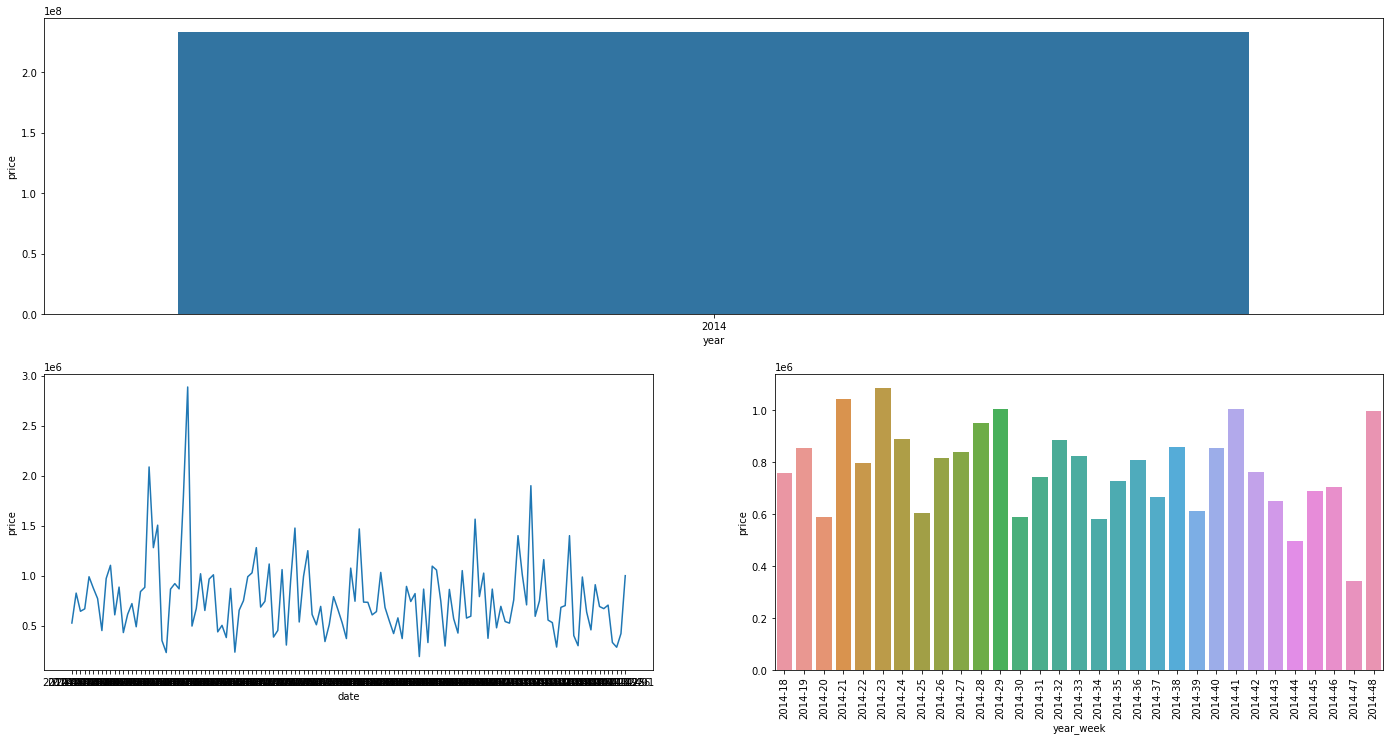

In [95]:
widgets.interactive(update_map,
                    data = fixed(data),
                    datelimit = date_limit,
                    yr_renovated_limit = yr_renovated_limit,
                    waterfront_filter = waterfront_filter)